# K-최근접 이웃 (K-Nearest Neighbors, K-NN)
- 분류(Classification)와 회귀(Regression) 를 모두 지원한다.
- 예측하려는 데이터와 input 데이터들 간의 거리를 측정해 가장 가까운 K개의 데이터셋의 레이블을 참조해 분류/예측한다.
- 학습시 단순히 input 데이터들을 저장만 하며 예측 시점에 거리를 계산한다.
    - 학습은 빠르지만 예측시 시간이 많이 걸린다.


## 분류
![knn1](images/knn-1.png)

- K-NN에서 **K**는 새로운 데이터포인트를 분류할때 확인할 데이터 포인트의 개수를 지정하는 **하이퍼파라미터**

![knn-2](images/knn-2.png)

- K를 1로 하면 <font color='blue'>파란색</font>, K를 3으로 하면 <font color='orange'>주황색</font> 으로 분류한다.
- K가 너무 작으면 과적합(Overfitting)이 일어나고 K가 너무 크면 성능이 나빠진다. (Underfitting). 
    - Overfitting: K값을 더 크게 잡는다.
    - Underfitting: K값을 더 작게 잡는다.

## 주요 하이퍼 파라미터
- **sklearn.neighbors.KNeighborsClassifier** 사용
- 이웃 수 
    - n_neighbors = K
    - **K가 작을 수록 모델이 복잡해져 과적합이 일어나고 너무 크면 단순해져 성능이 나빠진다.**
    - n_neighbors는 Feature수의 제곱근 정도를 지정할 때 성능이 좋은 것으로 알려져 있다.
- 거리 재는 방법 
    - p=2: 유클리디안 거리(Euclidean distance - 기본값)
    - p=1: 맨하탄 거리(Manhattan distance)
    

> ### 유클리디안 거리(Euclidean_distance)
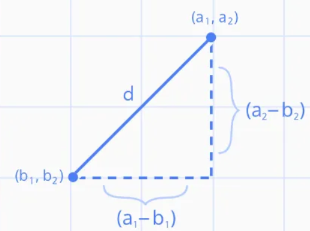

$$
distance = \sqrt{(a_1 - b_1)^2 + (a_2-b_2)^2}\\
n차원 벡터간의 거리 = \sqrt{(a_1 - b_1)^2 + (a_2-b_2)^2 +...+(a_n-b_n)^2}
$$

> ### 맨하탄 거리 (Manhattan distance)
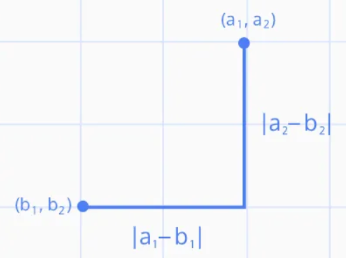

$$
distance = |a_1 - b_1| + |a_2 - b_2| \\
𝑛차원벡터간의거리= |a_1 - b_1| + |a_2 - b_2| + ... + |a_n - b_n|
$$

## 요약
- K-NN은 이해하기 쉬운 모델이며 튜닝할 하이퍼파라미터의 수가 적어 빠르게 만들 수있다.

- K-NN은 서비스할 모델을 구현할때 보다는 **복잡한 알고리즘을 적용해 보기 전에 확인용 또는 base line을 잡기 위한 모델로 사용한다.**

- 훈련세트가 너무 큰 경우(Feature나 관측치의 개수가 많은 경우) 거리를 계산하는 양이 늘어나 예측이 느려진다.
    - 추론에 시간이 많이 걸린다.

- Feature간의 값의 단위가 다르면 큰 단위의 Feature에 영향을 많이 받게 되므로 **전처리로 Feature Scaling작업**이 필요하다.

- Feature가 너무 많은 경우와 대부분의 값이 0으로 구성된(희소-sparse) 데이터셋에서 성능이 아주 나쁘다

## 위스콘신 유방암 데이터를 이용한 암환자분류
### K값 변화에 따른 성능 변화 확인

##### 데이터셋 로드, train/test set 분리

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

In [2]:
np.unique(y, return_counts=True)

(array([0, 1]), array([212, 357], dtype=int64))

##### Feature scaling

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### 학습
- k값 변화에 따른 accuracy의 변화 확인

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

train_acc = []
test_acc = []

k_params = range(1,10) # 1 ~ 10
for k in k_params:
    # 모델 생성
    knn = KNeighborsClassifier(n_neighbors = k)
    
    # 학습
    knn.fit(X_train_scaled, y_train)

    #추론 및 평가
    pred_train = knn.predict(X_train_scaled)
    pred_test = knn.predict(X_test_scaled)
    
    #평가
    train_acc.append(accuracy_score(y_train, pred_train))
    test_acc.append(accuracy_score(y_test, pred_test))

##### 결과확인

In [6]:
train_acc, test_acc

([1.0,
  0.9812206572769953,
  0.9812206572769953,
  0.9859154929577465,
  0.9812206572769953,
  0.9812206572769953,
  0.9741784037558685,
  0.9741784037558685,
  0.9741784037558685],
 [0.965034965034965,
  0.958041958041958,
  0.965034965034965,
  0.972027972027972,
  0.965034965034965,
  0.972027972027972,
  0.965034965034965,
  0.972027972027972,
  0.965034965034965])

In [9]:
df = pd.DataFrame({
    "K":k_params,
    "Train":train_acc,
    "Test": test_acc   
})
df.set_index('K', inplace=True) #컬럼을 index name으로 변환

In [10]:
df

Train      Test
K                    
1  1.000000  0.965035
2  0.981221  0.958042
3  0.981221  0.965035
4  0.985915  0.972028
5  0.981221  0.965035
6  0.981221  0.972028
7  0.974178  0.965035
8  0.974178  0.972028
9  0.974178  0.965035

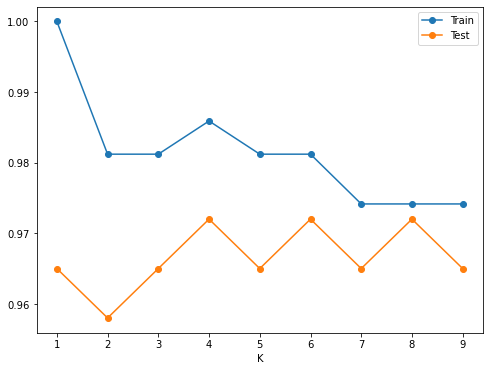

In [12]:
import matplotlib.pyplot as plt
df.plot(figsize=(8,6), marker='o')
plt.show()

In [14]:
best_model = KNeighborsClassifier(n_neighbors=8)
best_model.fit(X_train_scaled, y_train)
#예측
pred_train = best_model.predict(X_train_scaled)
pred_test = best_model.predict(X_test_scaled)
#평가
print('Train 정확도: ',accuracy_score(y_train, pred_train))
print('Test 정확도: ',accuracy_score(y_test, pred_test))

Train 정확도:  0.9741784037558685
Test 정확도:  0.972027972027972


## GridSearch/Pipline 을 이용해 구현
- Pipeline을 이용해 전처리기와 모델을 연결한다.
- GridSearchCV를 이용해 최적의 하이퍼파라미터를 검색한다.

##### 데이터셋 로드 및 train/test set 나누기

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=0)

##### Pipeline/GridSearchCV 생성 및 학습

In [17]:
order = [
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier())
]
pipeline = Pipeline(order, verbose=True)

param = {
    "knn__n_neighbors":range(1,11), 
    "knn__p":[1,2]
}
gs = GridSearchCV(pipeline, param, scoring='accuracy', cv=5, n_jobs=-1)

gs.fit(X_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing knn, total=   0.0s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())],
                                verbose=True),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': range(1, 11), 'knn__p': [1, 2]},
             scoring='accuracy')

##### 결과확인

In [18]:
result_df = pd.DataFrame(gs.cv_results_)
result_df[result_df.columns[6:]].sort_values('rank_test_score').head()

params  split0_test_score  \
4   {'knn__n_neighbors': 3, 'knn__p': 1}           0.953488   
13  {'knn__n_neighbors': 7, 'knn__p': 2}           0.941860   
6   {'knn__n_neighbors': 4, 'knn__p': 1}           0.953488   
12  {'knn__n_neighbors': 7, 'knn__p': 1}           0.930233   
15  {'knn__n_neighbors': 8, 'knn__p': 2}           0.953488   

    split1_test_score  split2_test_score  split3_test_score  \
4            0.988235           0.988235           0.988235   
13           0.988235           0.976471           1.000000   
6            0.988235           0.988235           1.000000   
12           0.988235           0.988235           0.988235   
15           0.976471           0.976471           1.000000   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
4            1.000000         0.983639        0.015749                1  
13           0.988235         0.978960        0.019987                2  
6            0.964706         0.978933        0.017127                3  
12           0.988235         0.976635        0.023201                4  
15           0.976471         0.976580        0.014709                5

In [19]:
gs.best_params_

{'knn__n_neighbors': 3, 'knn__p': 1}

In [21]:
best_model = gs.best_estimator_
type(best_model)

sklearn.pipeline.Pipeline

In [23]:
pred_test = best_model.predict(X_test)
# 평가
accuracy_score(y_test, pred_test)

0.951048951048951

# TODO: iris dataset 분류
- model: KNN 사용
- gridsearch를 이용해서 최적의 K값 찾는다.

##### 데이터셋 로드 및 분리

In [26]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score

In [25]:
X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, stratify=y)


##### Pipeline 생성

In [28]:
order = [
    ('scaler', StandardScaler()), 
    ('knn', KNeighborsClassifier())
]
pipeline = Pipeline(order, verbose=True)
# pipeline2 = make_pipeline(StandardScaler(), KNeighborsClassifier())

##### GridSearchCV 생성 및 학습

In [33]:
param = {
    'knn__n_neighbors':range(1, 20)
}
gs = GridSearchCV(pipeline, #모델
                  param, # 하이퍼파라미터 후보들, 
#                   scoring='accuracy',
                  cv=4, 
                  n_jobs=-1
                 )

In [34]:
gs.fit(X_train, y_train) #pipeline.fit()

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing knn, total=   0.0s


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())],
                                verbose=True),
             n_jobs=-1, param_grid={'knn__n_neighbors': range(1, 20)})

##### 결과 확인

In [35]:
gs.best_score_

0.9750000000000001

In [36]:
gs.best_params_

{'knn__n_neighbors': 3}

In [40]:
df = pd.DataFrame(gs.cv_results_)
df.sort_values('rank_test_score')

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
2        0.003991      0.000704         0.005235        0.002272   
4        0.005233      0.002161         0.005731        0.001092   
11       0.011960      0.003009         0.008480        0.004710   
14       0.004240      0.001083         0.008473        0.003030   
9        0.013476      0.005304         0.012710        0.007067   
8        0.013214      0.011270         0.005741        0.001482   
17       0.002493      0.000497         0.004238        0.000827   
10       0.034157      0.015016         0.007482        0.004487   
16       0.004738      0.001086         0.004487        0.000499   
15       0.003730      0.000814         0.004991        0.000708   
13       0.007232      0.003816         0.006232        0.004489   
12       0.015968      0.013514         0.006720        0.002773   
18       0.002743      0.000433         0.003739        0.000432   
6        0.016706      0.017480         0.007230        0.005152   
5        0.008230      0.005433         0.006232        0.002941   
3        0.005236      0.002271         0.004990        0.001998   
7        0.009232      0.003951         0.005728        0.002154   
1        0.005486      0.001115         0.006733        0.002674   
0        0.003492      0.000500         0.004487        0.000863   

   param_knn__n_neighbors                    params  split0_test_score  \
2                       3   {'knn__n_neighbors': 3}           1.000000   
4                       5   {'knn__n_neighbors': 5}           0.966667   
11                     12  {'knn__n_neighbors': 12}           1.000000   
14                     15  {'knn__n_neighbors': 15}           1.000000   
9                      10  {'knn__n_neighbors': 10}           1.000000   
8                       9   {'knn__n_neighbors': 9}           1.000000   
17                     18  {'knn__n_neighbors': 18}           1.000000   
10                     11  {'knn__n_neighbors': 11}           1.000000   
16                     17  {'knn__n_neighbors': 17}           1.000000   
15                     16  {'knn__n_neighbors': 16}           1.000000   
13                     14  {'knn__n_neighbors': 14}           1.000000   
12                     13  {'knn__n_neighbors': 13}           1.000000   
18                     19  {'knn__n_neighbors': 19}           1.000000   
6                       7   {'knn__n_neighbors': 7}           0.966667   
5                       6   {'knn__n_neighbors': 6}           0.966667   
3                       4   {'knn__n_neighbors': 4}           0.966667   
7                       8   {'knn__n_neighbors': 8}           0.966667   
1                       2   {'knn__n_neighbors': 2}           0.966667   
0                       1   {'knn__n_neighbors': 1}           0.966667   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
2            0.966667           0.966667           0.966667         0.975000   
4            0.966667           0.966667           1.000000         0.975000   
11           0.933333           0.966667           1.000000         0.975000   
14           0.966667           0.966667           0.933333         0.966667   
9            0.933333           0.933333           1.000000         0.966667   
8            0.933333           0.933333           1.000000         0.966667   
17           0.933333           0.966667           0.966667         0.966667   
10           0.933333           0.966667           0.966667         0.966667   
16           0.933333           0.966667           0.933333         0.958333   
15           0.933333           0.966667           0.933333         0.958333   
13           0.933333           0.966667           0.933333         0.958333   
12           0.933333           0.966667           0.933333         0.958333   
18           0.933333           0.966667           0.933333         0.958333   
6            0.933333           0.933333  

In [42]:
#최종평가
pred_test = gs.predict(X_test)
accuracy_score(y_test, pred_test)

0.9

In [43]:
best_model = gs.best_estimator_
accuracy_score(y_test, best_model.predict(X_test))

0.9